<h1>Capstone 1</h1>
<h2>Wine Quality Data Set, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>September 20, 2020</h4>
<h2>Import Python Packages</h2>

In [118]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [119]:
#Import csv files into Pandas data frames
reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")


In [120]:
#Add 'wine type' column to each data frame and population with 'red' or 'white' for each
reddf['wine type'] = 1
whitedf['wine type'] = 0

In [121]:
#Look at the first few records of combined red wine dataframe with new column
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [122]:
#Look at the first few records of combined white wine dataframe with new column
whitedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [123]:
#combine the two dataframes for red and white wine into one data frame for all wines
winedf = reddf.append(whitedf, ignore_index=True)


<h5>Removing Outliers</h5>


In [124]:

ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = winedf[winedf[myValue] >= gtdropvalue].index
    index_names_left = winedf[winedf[myValue] <= ltdropvalue].index
    winedf.drop(index_names_right, inplace = True)
    winedf.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
    


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

#df.drop(df[df['d'] >500000].index, inplace = True)

fixed acidity maximum: 15.9
fixed acidity minimum: 3.8
fixed acidity Q1: 6.4
fixed acidity Q3: 7.7
fixed acidity range: 12.100000000000001
fixed acidity IQR: 1.2999999999999998
ratio of Range fo IQR: 9.30769230769231

volatile acidity maximum: 1.58
volatile acidity minimum: 0.08
volatile acidity Q1: 0.22
volatile acidity Q3: 0.39
volatile acidity range: 1.5
volatile acidity IQR: 0.17
ratio of Range fo IQR: 8.823529411764705

citric acid maximum: 1.66
citric acid minimum: 0.0
citric acid Q1: 0.26
citric acid Q3: 0.38
citric acid range: 1.66
citric acid IQR: 0.12
ratio of Range fo IQR: 13.833333333333334

residual sugar maximum: 31.6
residual sugar minimum: 0.6
residual sugar Q1: 1.8
residual sugar Q3: 8.675
residual sugar range: 31.0
residual sugar IQR: 6.875000000000001
ratio of Range fo IQR: 4.509090909090909

chlorides maximum: 0.42200000000000004
chlorides minimum: 0.009000000000000001
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.054000000000000006
chlorides range: 0.413000000

<h5>Checking for NULL Values</h5>


In [125]:
#Check for null values in Wine data
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

<AxesSubplot:>

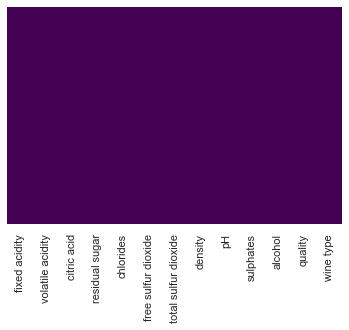

In [126]:
sns.heatmap(winedf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h2>Exploratory Data Analysis</h2>

In [127]:
#Descriptive Statistics for Wine Data
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,6.911399,0.283726,0.319456,5.927825,0.044523,33.056393,129.974645,0.993998,3.200975,0.493718,10.589092,5.917596,0.077814
std,0.831594,0.100837,0.088763,4.735945,0.012686,15.352960,46.714524,0.002817,0.143386,0.108575,1.212198,0.865701,0.267908
min,4.700000,0.080000,0.090000,0.600000,0.012000,2.000000,8.000000,0.987110,2.820000,0.220000,8.400000,3.000000,0.000000
25%,6.400000,0.210000,0.260000,1.800000,0.036000,22.000000,101.000000,0.991705,3.100000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.270000,0.310000,4.600000,0.043000,32.000000,128.000000,0.993880,3.190000,0.480000,10.500000,6.000000,0.000000
75%,7.400000,0.330000,0.370000,8.900000,0.051000,44.000000,162.000000,0.996100,3.300000,0.560000,11.400000,6.000000,0.000000
max,9.600000,0.640000,0.550000,18.950000,0.081000,78.000000,253.000000,1.001820,3.590000,0.790000,14.200000,9.000000,1.000000


"Quality" is the attribute we want to be able to predict using the other attributes.  Because it is a categorical variable, mode and median are more meaningful than mean. Let's look more at the values for 'quality' in each data set.

In [128]:
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

fixed acidity maximum: 9.6
fixed acidity minimum: 4.7
fixed acidity range: 4.8999999999999995
fixed acidity IQR: 1.0
ratio of Range fo IQR: 4.8999999999999995

volatile acidity maximum: 0.64
volatile acidity minimum: 0.08
volatile acidity range: 0.56
volatile acidity IQR: 0.12000000000000002
ratio of Range fo IQR: 4.666666666666666

citric acid maximum: 0.55
citric acid minimum: 0.09
citric acid range: 0.4600000000000001
citric acid IQR: 0.10999999999999999
ratio of Range fo IQR: 4.181818181818183

residual sugar maximum: 18.95
residual sugar minimum: 0.6
residual sugar range: 18.349999999999998
residual sugar IQR: 7.1000000000000005
ratio of Range fo IQR: 2.5845070422535206

chlorides maximum: 0.081
chlorides minimum: 0.012
chlorides range: 0.069
chlorides IQR: 0.014999999999999993
ratio of Range fo IQR: 4.600000000000002

free sulfur dioxide maximum: 78.0
free sulfur dioxide minimum: 2.0
free sulfur dioxide range: 76.0
free sulfur dioxide IQR: 22.0
ratio of Range fo IQR: 3.4545454545

In [129]:
winedf['quality'].unique()

array([6, 5, 7, 4, 8, 3, 9])

In [130]:
winedf.quality.value_counts().sort_index()

3      11
4     119
5    1318
6    2087
7     873
8     162
9       5
Name: quality, dtype: int64

Wine Quality


<AxesSubplot:xlabel='quality', ylabel='count'>

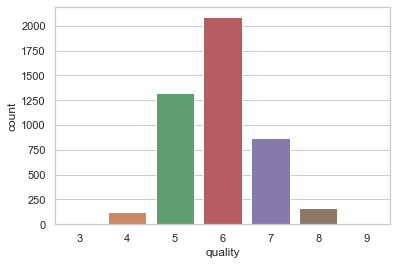

In [131]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=winedf)

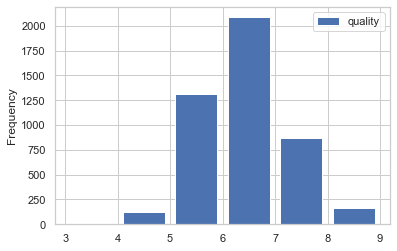

In [132]:
#Histogram of Wine Quality with pyplot
import matplotlib.pyplot as plt
import pandas as pd

winedf[['quality']].plot(kind='hist',bins=[3,4,5,6,7,8,9],rwidth=0.8)
plt.show()

In [133]:
#Reassign Wine Quality to Rating
conditions = [
    (winedf['quality'] >= 7),
    (winedf['quality'] <= 4)
]

rating = ['superior', 'inferior']
winedf['rating'] = np.select(conditions, rating, default='fine')
winedf.rating.value_counts()

fine        3405
superior    1040
inferior     130
Name: rating, dtype: int64

Wine Rating


<AxesSubplot:xlabel='rating', ylabel='count'>

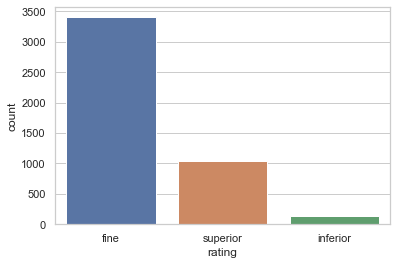

In [134]:
#Histogram of Wine Rating
print('Wine Rating')
sns.countplot(x='rating', data=winedf)

<h2>Histograms</h2>

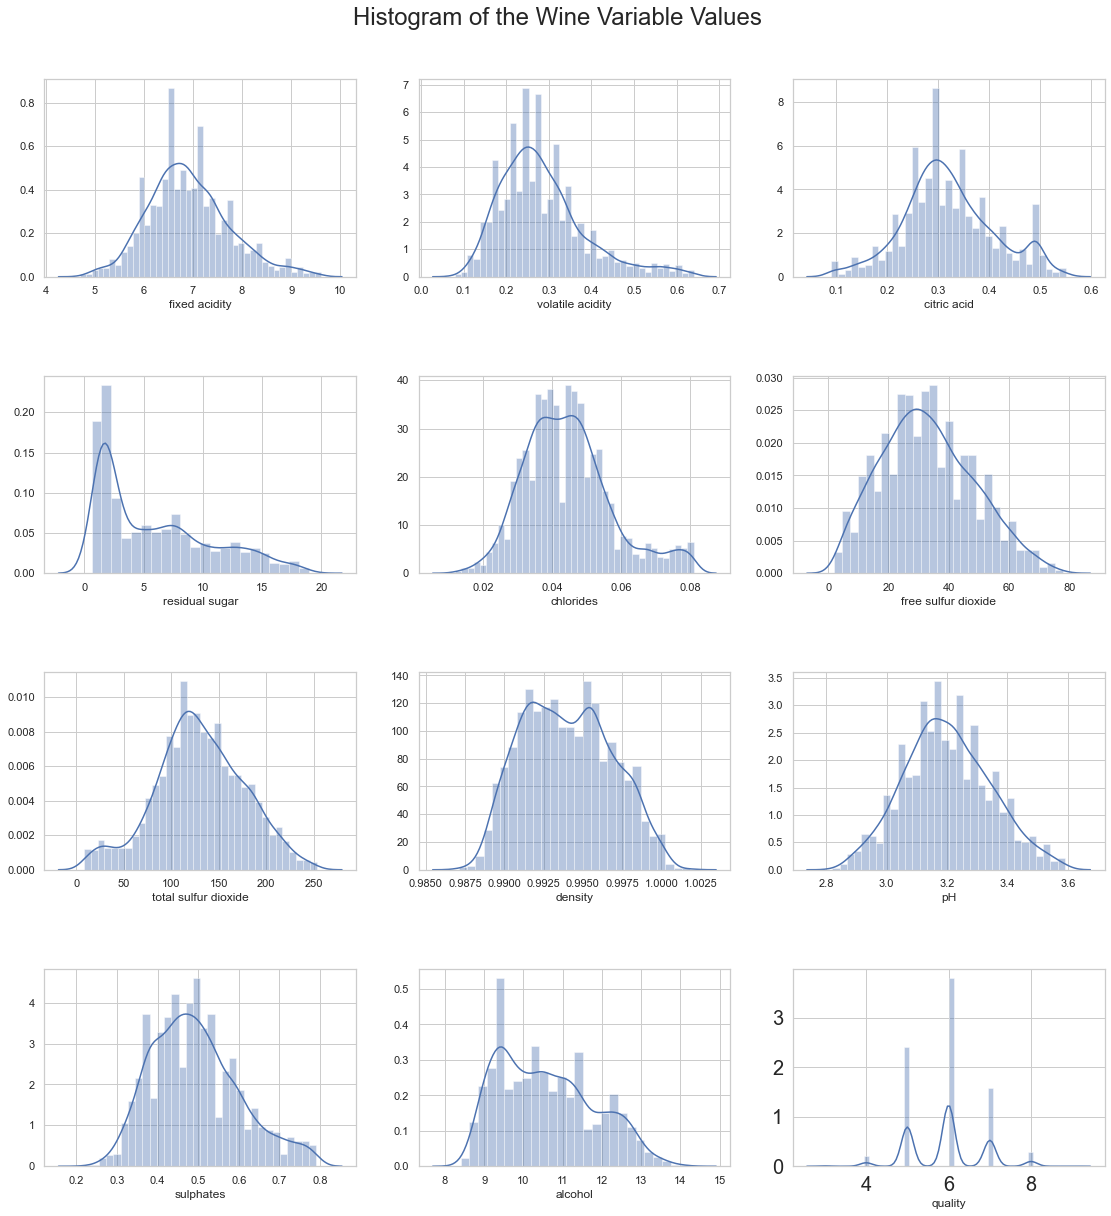

In [135]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(winedf.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myhistplot = subplot_hist(winedf[plot_columns], row = 4, column = 3, title = "Histogram of the Wine Variable Values")






In [136]:
winedf_bins = winedf.copy()
bins = [0,5,10]

labels = [0,1] #low=0,high-1
winedf_bins['quality_range']=pd.cut(x=winedf_bins['quality'],bins=bins,labels=labels)
print(winedf_bins[['quality_range','quality']].head(10))

winedf_bins = winedf_bins.drop('quality',axis=1)

   quality_range  quality
20             1        6
25             0        5
26             0        5
33             1        6
37             1        7
48             0        5
49             0        5
53             0        5
58             0        5
59             1        6


In [137]:
winedf_bins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 20 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4575 non-null   float64 
 1   volatile acidity      4575 non-null   float64 
 2   citric acid           4575 non-null   float64 
 3   residual sugar        4575 non-null   float64 
 4   chlorides             4575 non-null   float64 
 5   free sulfur dioxide   4575 non-null   float64 
 6   total sulfur dioxide  4575 non-null   float64 
 7   density               4575 non-null   float64 
 8   pH                    4575 non-null   float64 
 9   sulphates             4575 non-null   float64 
 10  alcohol               4575 non-null   float64 
 11  wine type             4575 non-null   int64   
 12  rating                4575 non-null   object  
 13  quality_range         4575 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory

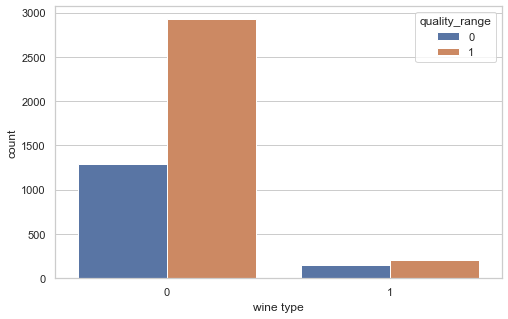

In [138]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'wine type', hue = 'quality_range', data = winedf_bins)
plt.show()

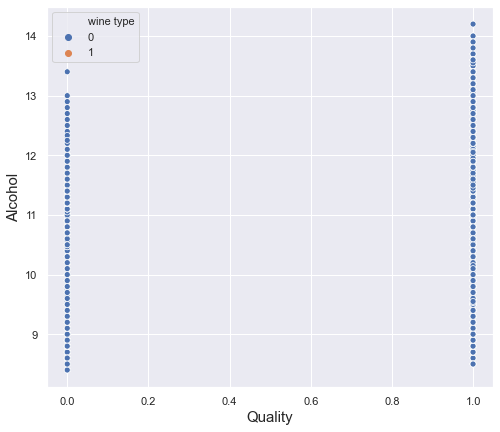

In [139]:
import seaborn as sns; sns.set()

plt.figure(figsize=(8,7))
#sns.countplot(x = 'wine type', hue = 'alcohol', data = winedf_bins)
sns.scatterplot(x='quality_range', y='alcohol', hue='wine type',data=winedf_bins)
plt.xlabel('Quality', size = 15)
plt.ylabel('Alcohol', size = 15)
plt.show()

# Computing Skewness

In [140]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('Wine Skewness')

skewness_check(winedf[plot_columns])

Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,0.453980,Light Skewed
1,volatile acidity,1.031130,Heavily Skewed
2,citric acid,0.216880,Light Skewed
3,residual sugar,0.822170,Heavily Skewed
4,chlorides,0.655060,Heavily Skewed
5,free sulfur dioxide,0.312143,Light Skewed
6,total sulfur dioxide,-0.075947,Light Skewed
7,density,0.156756,Light Skewed
8,pH,0.169411,Light Skewed
9,sulphates,0.518275,Heavily Skewed


<h2>Box Plots</h2>

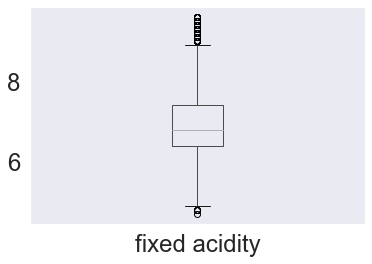

In [141]:
winedf.boxplot(column=['fixed acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/01BoxPlotFixedAcidity.png")

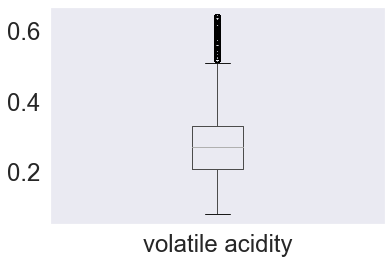

In [142]:
winedf.boxplot(column=['volatile acidity'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/02BoxPlotVolatileAcidity.png")
              

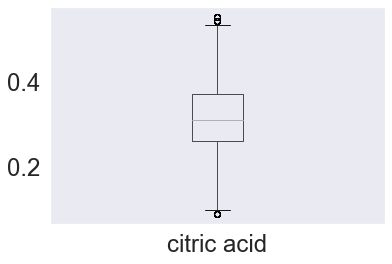

In [143]:
winedf.boxplot(column=['citric acid'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/03BoxPlotCitricAcid.png")

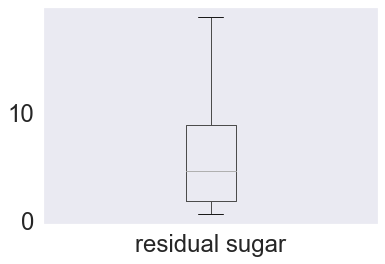

In [144]:
winedf.boxplot(column=['residual sugar'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/04BoxPlotResidualSugar.png")

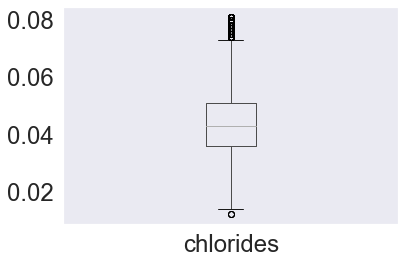

In [145]:
winedf.boxplot(column=['chlorides'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/05BoxChlorides.png")

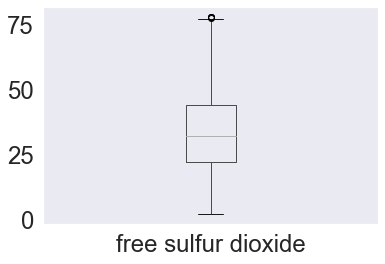

In [146]:
winedf.boxplot(column=['free sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/06BoxPlotFreeSulfurDioxide.png")

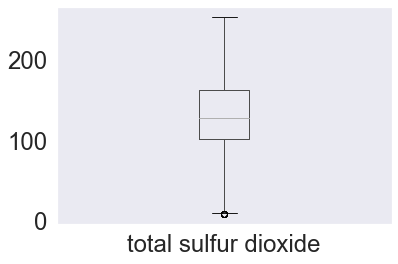

In [147]:
winedf.boxplot(column=['total sulfur dioxide'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/07BoxPlotTotalSulfurDioxide.png")

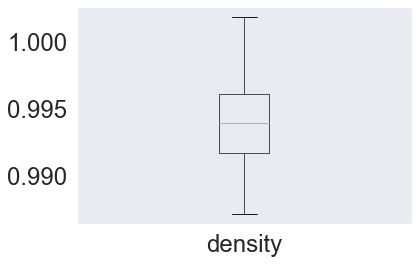

In [148]:
winedf.boxplot(column=['density'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/08BoxPlotDensity.png")

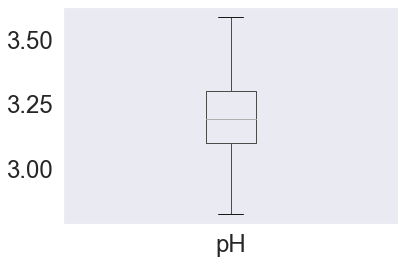

In [149]:
winedf.boxplot(column=['pH'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/09BoxPlotpH.png")

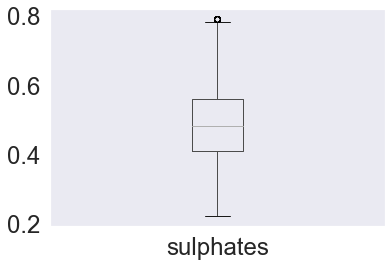

In [150]:
winedf.boxplot(column=['sulphates'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/10BoxPlotSulphates.png")

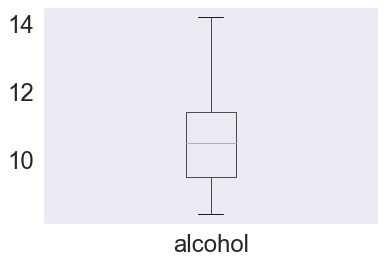

In [151]:
winedf.boxplot(column=['alcohol'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/11BoxPlotAlcohol.png")

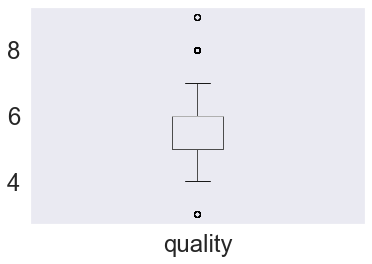

In [152]:
winedf.boxplot(column=['quality'], fontsize = 24, grid=False)
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/12BoxPlotQuality.png")

Observations regarding Wine variables

<ul>
    <li>Quality is normally distributed with a slight left skew. Most values in Quality are concentrated in 5, 6 and 7. Values range from 3 to 9, with no values in 1, 2, or 10.
    <li>All variables have outliers, mostly on the large side (left-skewed).
    <li>The distributions for fixed acidity, volatile acidity and citric acid would be symmetricdal if outliers were removed. 
    <li>In contract, removing outliers from residual sugar would have little or no effect on its skewness; it will remain positively skewed.
    <li>Density and alcohol have only a few outliers, making it different from the other variables
    <li>Alcohol does not have a normal distributiomn. It has an irregular, step-down pattern toward higher alcohol levels. It does not have any pronounced outliers.
    <li>Total Sulfur Dioxide and Density appear to have bimodal distributions.
    <li>Range is much larger compared to the IQR. Mean is usually greater than the median.  These observations indicate that there are outliers in the data set and before any analysis is performed outliers must be taken care of.

</ul>

  

<h2>Correlation Between Target Variable and Predictor Attributes</h2>

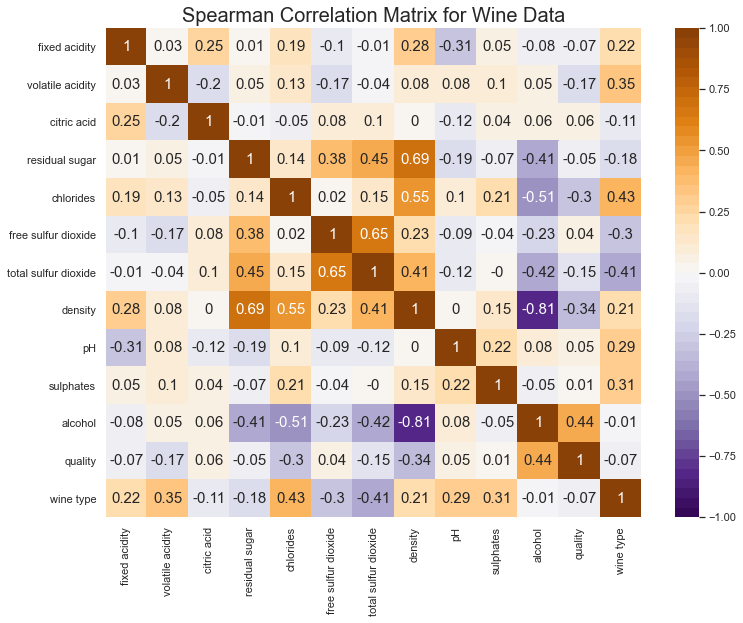

<Figure size 432x288 with 0 Axes>

In [153]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Spearman Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WineSpearmanBOD.png")





In [154]:
winedf.corr(method ="spearman")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.438278
citric acid             0.063361
pH                      0.049999
free sulfur dioxide     0.042364
sulphates               0.014279
residual sugar         -0.051808
wine type              -0.070196
fixed acidity          -0.073996
total sulfur dioxide   -0.147229
volatile acidity       -0.170554
chlorides              -0.300207
density                -0.339716
Name: quality, dtype: float64

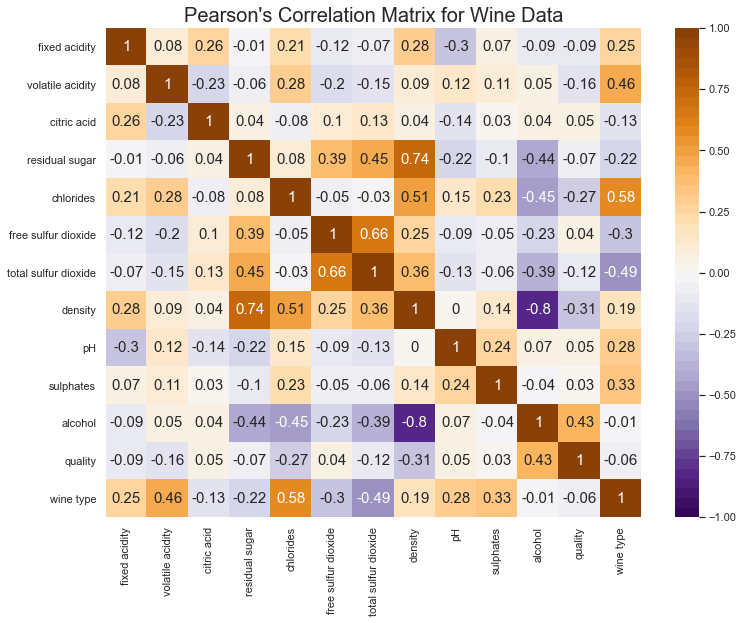

<Figure size 432x288 with 0 Axes>

In [155]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Pearson's Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WinePearsonsBOD.png")



In [156]:
winedf.corr(method ="pearson")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.432710
pH                      0.049083
citric acid             0.048409
free sulfur dioxide     0.041818
sulphates               0.030125
wine type              -0.062841
residual sugar         -0.073186
fixed acidity          -0.087174
total sulfur dioxide   -0.119894
volatile acidity       -0.163855
chlorides              -0.267661
density                -0.310473
Name: quality, dtype: float64

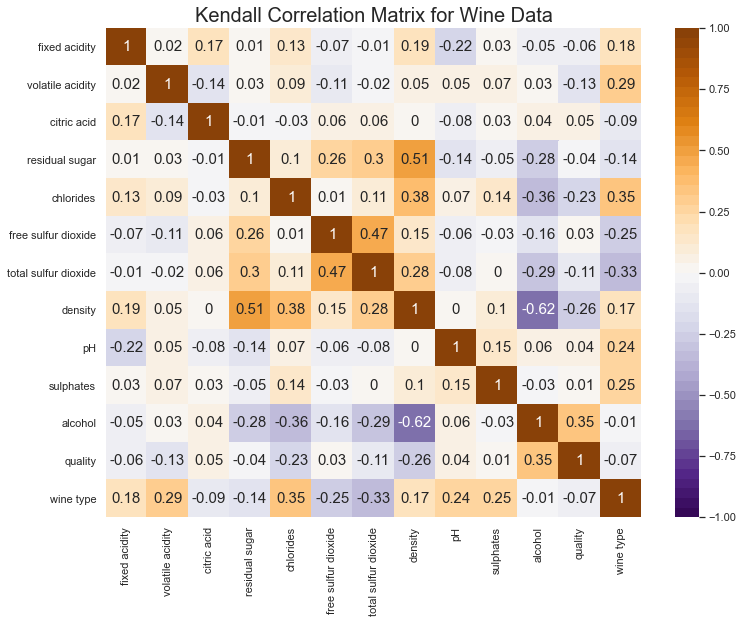

<Figure size 432x288 with 0 Axes>

In [157]:
def confusion_matrix_plot(data, title = "Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Kendall Correlation Matrix for Wine Data")
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WineKendallBOD.png")



In [158]:
winedf.corr(method ="kendall")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.345778
citric acid             0.049765
pH                      0.038388
free sulfur dioxide     0.032023
sulphates               0.011683
residual sugar         -0.039669
fixed acidity          -0.057232
wine type              -0.065440
total sulfur dioxide   -0.112757
volatile acidity       -0.133324
chlorides              -0.234052
density                -0.260015
Name: quality, dtype: float64

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.45), (2) density (-0.32), (3) chlorides (-0.30), (4) volatile acidity (-0.26), (5) citric acid (.11), (6) fixed acidity (-0.098), (7) free sulfur dioxide (0.087), (8) total sulfur dioxide (-0.055),(9) pH (-0.033), (10) sulphates (-0.030), and (11) residual sugar (-0.017).

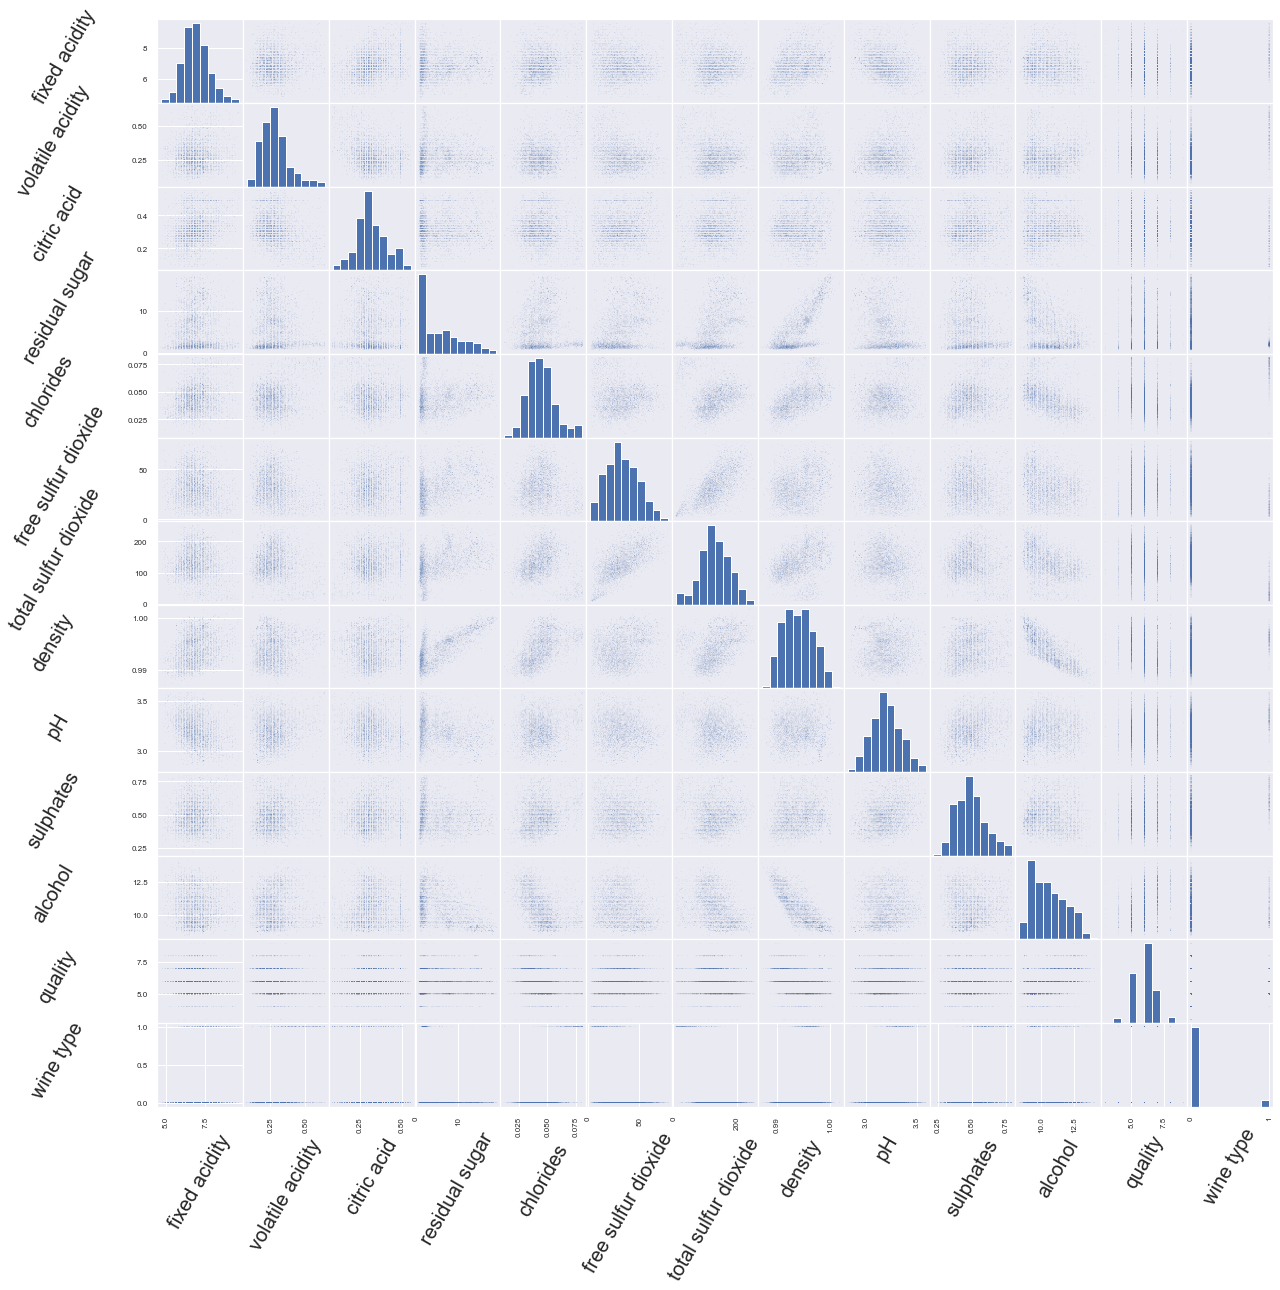

In [159]:
scatter_matrix = pd.plotting.scatter_matrix(
    winedf,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png")

<h2>Wine Quality Indicators</h2>

<h3>1. Alcohol</h3>

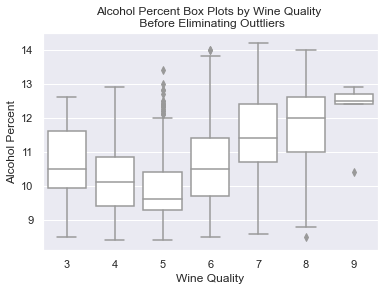

In [160]:
bx = sns.boxplot(x='quality', y='alcohol', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol Percent Box Plots by Wine Quality \n Before Eliminating Outtliers')

plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/01AlcoholByQualityBOD.png")

<h3>2. Density</h3>  

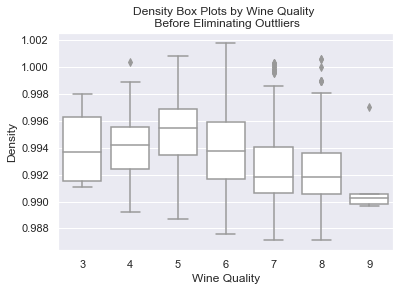

In [161]:
bx = sns.boxplot(x='quality', y='density', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Density', title='Density Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/02DensityByQualityBOD.png")

<h3>3. Chlorides</h3>    

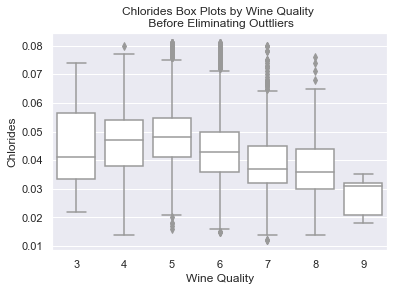

In [162]:
bx = sns.boxplot(x='quality', y='chlorides', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Chlorides', title='Chlorides Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/03ChloridesByQualityBOD.png")

<h3>4. Volatile Acidity</h3>      

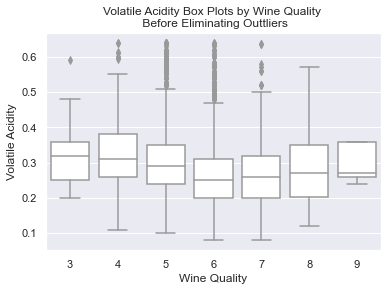

In [163]:
bx = sns.boxplot(x='quality', y='volatile acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Volatile Acidity', title='Volatile Acidity Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/04VolatileAcidityByQualityBOD.png")

<h3>5. Citric Acid</h3>

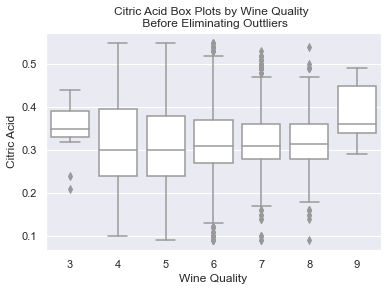

In [164]:
bx = sns.boxplot(x='quality', y='citric acid', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Citric Acid', title='Citric Acid Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/05itricAcidByQualityBOD.png")

<h3>6. Fixed Acidity</h3>  

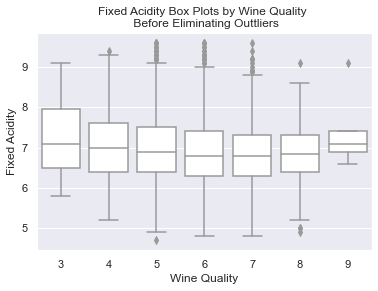

In [165]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Fixed Acidity', title='Fixed Acidity Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/06FixedAcidityByQualityBOD.png")

<h3>7. Free Sulfur Dioxide</h3>  

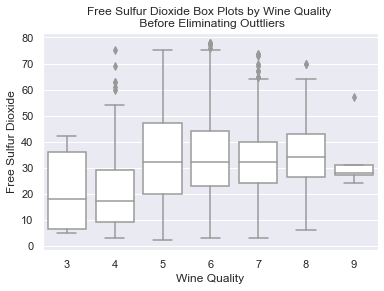

In [166]:
bx = sns.boxplot(x='quality', y='free sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Free Sulfur Dioxide', title='Free Sulfur Dioxide Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/07FreeSulfurDioxideByQualityBOD.png")


<h3>8. Total Sulfur Dioxide</h3> 

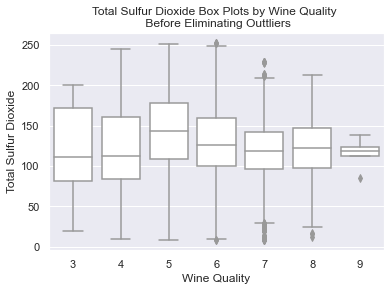

In [167]:
bx = sns.boxplot(x='quality', y='total sulfur dioxide', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Total Sulfur Dioxide', title='Total Sulfur Dioxide Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/08TotalSulfurByQualityBOD.png")

<h3>9. pH</h3> 

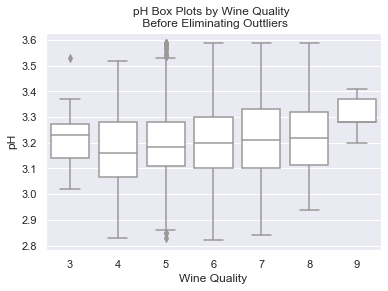

In [168]:
bx = sns.boxplot(x='quality', y='pH', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='pH', title='pH Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/09pHByQualityBOD.png")

<h3>10. Sulphates</h3>

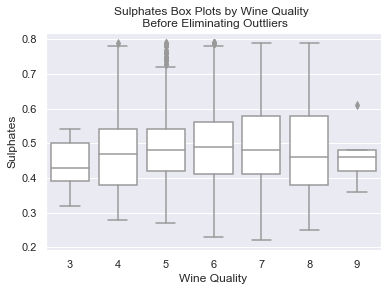

In [169]:
bx = sns.boxplot(x='quality', y='sulphates', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Sulphates', title='Sulphates Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/10SulphatesByQualityBOD.png")

<h3>11. Residual Sugar</h3>

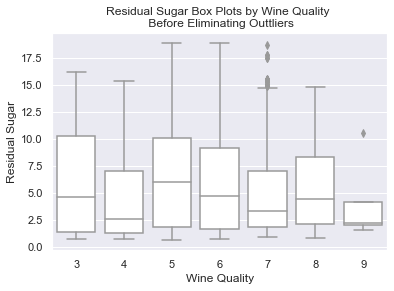

In [170]:
bx = sns.boxplot(x='quality', y='residual sugar', data = winedf, color = 'w')
bx.set(xlabel='Wine Quality', ylabel='Residual Sugar', title='Residual Sugar Box Plots by Wine Quality \n Before Eliminating Outtliers')
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/BoxPlotsBeforeOD/11ResidualSugarByQualityBOD.png")

<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed datta are positively skewed, we only need to eliminate those values.</p>

In [171]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 20 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4575 non-null   float64
 1   volatile acidity      4575 non-null   float64
 2   citric acid           4575 non-null   float64
 3   residual sugar        4575 non-null   float64
 4   chlorides             4575 non-null   float64
 5   free sulfur dioxide   4575 non-null   float64
 6   total sulfur dioxide  4575 non-null   float64
 7   density               4575 non-null   float64
 8   pH                    4575 non-null   float64
 9   sulphates             4575 non-null   float64
 10  alcohol               4575 non-null   float64
 11  quality               4575 non-null   int64  
 12  wine type             4575 non-null   int64  
 13  rating                4575 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 696.1+ KB


In [172]:
winedf_a = winedf
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf_a[myValue].max()
    myValueMin = winedf_a[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf_a[myValue].quantile(0.25)
    Q3 = winedf_a[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = winedf_a[winedf_a[myValue] >= gtdropvalue].index
    index_names_left = winedf_a[winedf_a[myValue] <= ltdropvalue].index
    winedf_a.drop(index_names_right, inplace = True)
    winedf_a.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
    


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

#df.drop(df[df['d'] >500000].index, inplace = True)

fixed acidity maximum: 9.6
fixed acidity minimum: 4.7
fixed acidity Q1: 6.4
fixed acidity Q3: 7.4
fixed acidity range: 4.8999999999999995
fixed acidity IQR: 1.0
ratio of Range fo IQR: 4.8999999999999995

volatile acidity maximum: 0.64
volatile acidity minimum: 0.08
volatile acidity Q1: 0.21
volatile acidity Q3: 0.33
volatile acidity range: 0.56
volatile acidity IQR: 0.12000000000000002
ratio of Range fo IQR: 4.666666666666666

citric acid maximum: 0.55
citric acid minimum: 0.09
citric acid Q1: 0.27
citric acid Q3: 0.37
citric acid range: 0.4600000000000001
citric acid IQR: 0.09999999999999998
ratio of Range fo IQR: 4.600000000000001

residual sugar maximum: 18.95
residual sugar minimum: 0.6
residual sugar Q1: 1.8
residual sugar Q3: 9.1
residual sugar range: 18.349999999999998
residual sugar IQR: 7.3
ratio of Range fo IQR: 2.513698630136986

chlorides maximum: 0.081
chlorides minimum: 0.012
chlorides Q1: 0.035
chlorides Q3: 0.05
chlorides range: 0.069
chlorides IQR: 0.015
ratio of Range

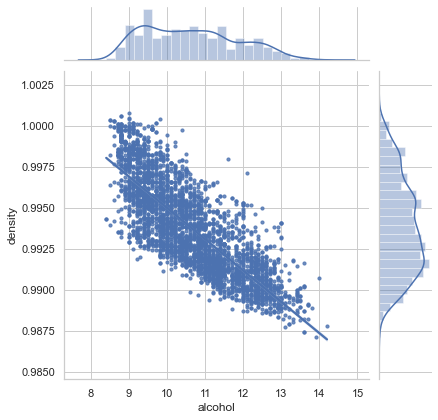

In [173]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=winedf_a,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


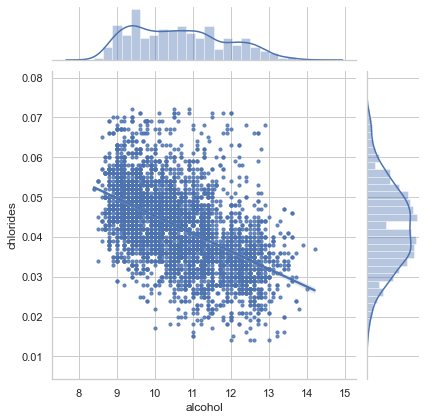

In [174]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=winedf_a, kind='reg',scatter_kws={'s':10})
plt.show()

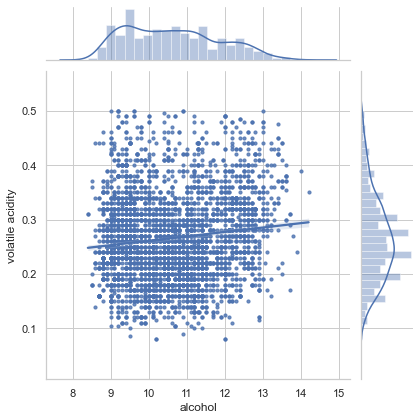

In [175]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile acidity', data=winedf_a, kind='reg',scatter_kws={'s':10})
plt.show()

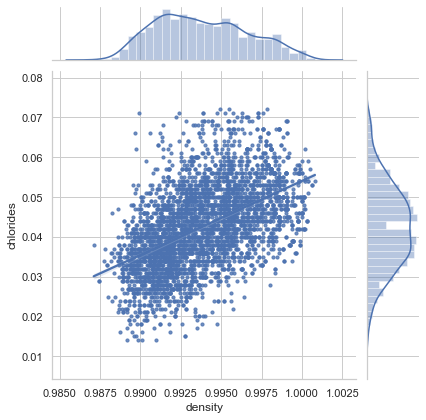

In [176]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=winedf_a, kind='reg',scatter_kws={'s':10})
plt.show()

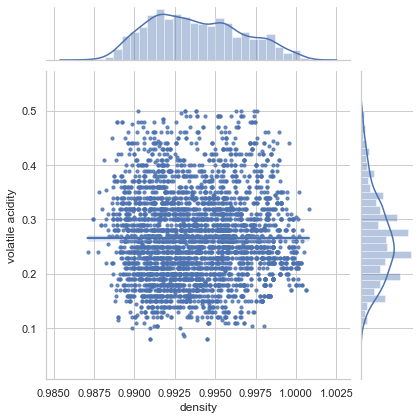

In [177]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile acidity', data=winedf_a, kind='reg',scatter_kws={'s':10})
plt.show()

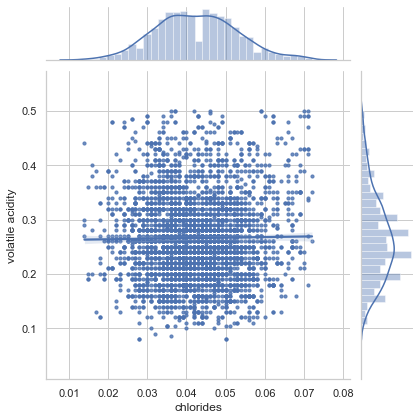

In [178]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile acidity', data=winedf_a, kind='reg',scatter_kws={'s':10})
plt.show()

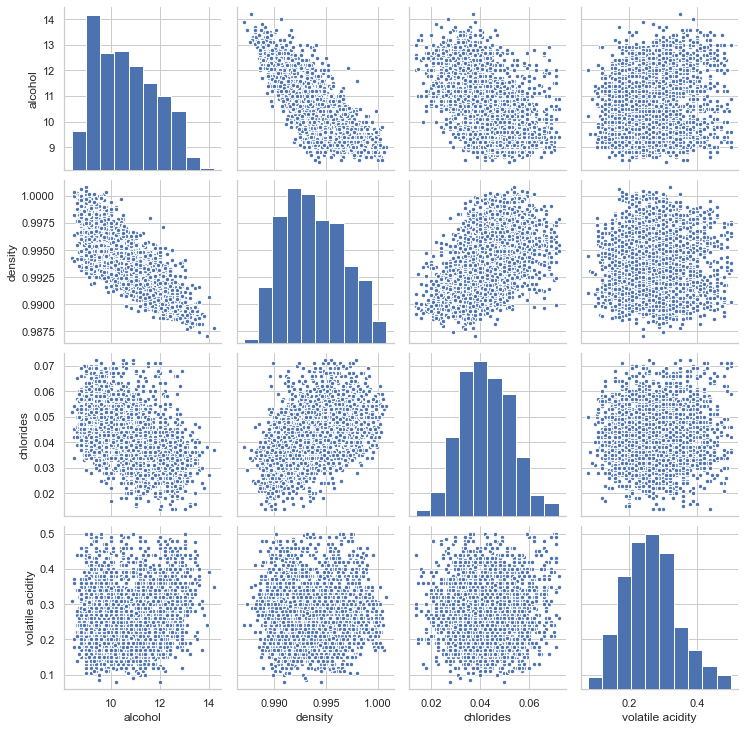

In [179]:

data = winedf_a[['alcohol', 'density', 'chlorides', 'volatile acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [180]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [181]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('quality ~ alcohol',winedf_a).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     791.5
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          6.42e-159
Time:                        01:06:20   Log-Likelihood:                -4642.4
No. Observations:                3959   AIC:                             9289.
Df Residuals:                    3957   BIC:                             9301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8898      0.110     26.304      0.0

In [182]:
m = ols('quality ~ density',winedf_a).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.92e-80
Time:                        01:06:20   Log-Likelihood:                -4822.9
No. Observations:                3959   AIC:                             9650.
Df Residuals:                    3957   BIC:                             9662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.8533      4.574     20.740      0.0

In [183]:
m = ols('quality ~ chlorides',winedf_a).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     301.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.53e-65
Time:                        01:06:20   Log-Likelihood:                -4858.2
No. Observations:                3959   AIC:                             9720.
Df Residuals:                    3957   BIC:                             9733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9010      0.056    123.800      0.0

In [184]:
#Convert 'wine type' to integer field where 0 = 'white' and 1 = 'red'

In [185]:
#This example is from the Springboard Linear Regression mini-project
#I'm not sure how it is supposed to work when there is a space in the variable name
#m = ols('quality','volatile acidity',winedf_a).fit()
#print(m.summary())

In [186]:
import statsmodels.api as sm

In [187]:
sm.__version__

'0.12.0'

Text(0.5, 1.0, 'Quality vs Predicted Quality: $Y_i$ vs $\\hat{Y}_i$\n(Thousands of Dollars)')

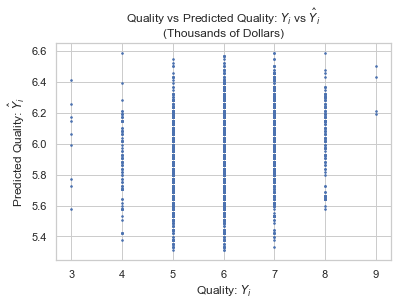

In [188]:
# your turn
# Plot

X = winedf_a['quality']
y = m.fittedvalues

plt.scatter(X, y, marker='.',s=10)
plt.xlabel("Quality: $Y_i$")
plt.ylabel("Predicted Quality: $\hat{Y}_i$")
plt.title("Quality vs Predicted Quality: $Y_i$ vs $\hat{Y}_i$\n(Thousands of Dollars)")



## Training a Linear Regression Model
## X and y arrays

In [189]:
y = winedf_a.quality
X = winedf_a.drop(['quality','rating'],axis=1)


## Train-Test Split

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [192]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
4872,6.4,0.230,0.32,1.9,0.038,40.0,118.0,0.99074,3.32,0.53,11.8,0
4644,5.7,0.120,0.26,5.5,0.034,21.0,99.0,0.99324,3.09,0.57,9.9,0
6348,6.2,0.350,0.25,18.4,0.051,28.0,182.0,0.99946,3.13,0.62,9.3,0
6409,5.4,0.375,0.40,3.3,0.054,29.0,147.0,0.99482,3.42,0.52,9.1,0
2189,7.1,0.310,0.50,14.5,0.059,6.0,148.0,0.99830,2.94,0.44,9.1,0


In [193]:
X_train.shape

(3167, 12)

## Creating and Training the Model I

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
lm = LinearRegression()


In [196]:
lm.fit(X_train,y_train)

LinearRegression()

In [197]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 183.7190075733619


In [198]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 12


In [199]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.148187
volatile acidity,-1.510381
citric acid,0.147454
residual sugar,0.089244
chlorides,-4.039559
free sulfur dioxide,0.005640
total sulfur dioxide,0.000083
density,-184.892037
pH,0.930936
sulphates,0.759282


## Predictions from our Model I

In [200]:
predictions = lm.predict(X_test)

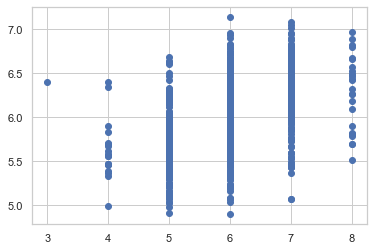

In [201]:
plt.scatter(y_test,predictions)

**Residual Histogram**

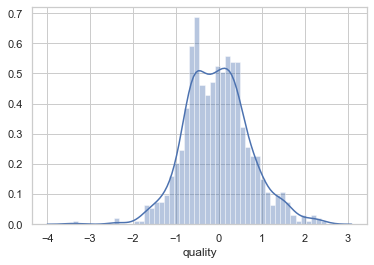

In [202]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [203]:
from sklearn import metrics

In [204]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5857354932953354
MSE: 0.556333229424689
RMSE: 0.7458774895548792


## Creating and Training the Model II

In [205]:
y = winedf_a.quality
X = winedf_a.drop(['quality','rating','density','wine type'],axis=1)

## Train-Test Split II


In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [208]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
4872,6.4,0.230,0.32,1.9,0.038,40.0,118.0,3.32,0.53,11.8
4644,5.7,0.120,0.26,5.5,0.034,21.0,99.0,3.09,0.57,9.9
6348,6.2,0.350,0.25,18.4,0.051,28.0,182.0,3.13,0.62,9.3
6409,5.4,0.375,0.40,3.3,0.054,29.0,147.0,3.42,0.52,9.1
2189,7.1,0.310,0.50,14.5,0.059,6.0,148.0,2.94,0.44,9.1


In [209]:
X_train.shape

(3167, 10)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
lm = LinearRegression()


In [212]:
lm.fit(X_train,y_train)

LinearRegression()

In [213]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 1.3567811188657286


In [214]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 10


In [215]:
coeff_df = pd.DataFrame({'Feature': X.columns,"Estimated Coefficient": lm.coef_})
coeff_df

,Feature,Estimated Coefficient
0,fixed acidity,0.007196
1,volatile acidity,-1.568481
2,citric acid,0.065031
3,residual sugar,0.023762
4,chlorides,-6.176800
5,free sulfur dioxide,0.006923
6,total sulfur dioxide,-0.000641
7,pH,0.327314
8,sulphates,0.497565
9,alcohol,0.342487


In [216]:
#print first five predicted qualities
lm.predict(X)[0:5]

array([5.29283481, 5.0810834 , 5.0810834 , 4.78910709, 4.83525288])

Text(0, 0.5, 'Frequency')

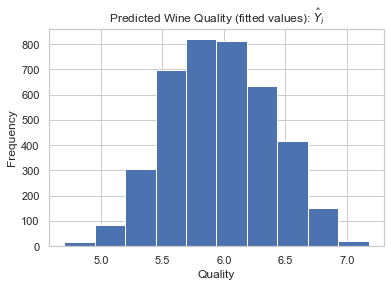

In [217]:
plt.hist(lm.predict(X))
plt.title('Predicted Wine Quality (fitted values): $\hat{Y}_i$')
plt.xlabel('Quality')
plt.ylabel('Frequency')

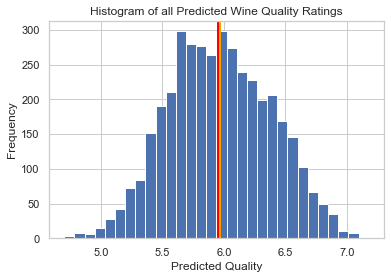

In [218]:
# your turn
plt.hist(lm.predict(X), bins=30)
plt.xlabel("Predicted Quality")
plt.ylabel("Frequency")
plt.axvline(np.median(lm.predict(X)), ls='-', c='red', lw=2)
plt.axvline(np.mean(lm.predict(X)), ls='-', c='orange', lw=2)
plt.title("Histogram of all Predicted Wine Quality Ratings")

plt.show()

In [219]:
# Median value of the Prices
print("Median value of the Wine Quality is: {}".format(np.median(lm.predict(X))))



Median value of the Wine Quality is: 5.952167606387396


In [220]:
#Turn the np array lm.predict(X) into a dataframe to extract some summer statistics
pd.DataFrame(lm.predict(X)).describe()


,0
count,3959.000000
mean,5.967240
std,0.416109
min,4.703540
25%,5.655311
50%,5.952168
75%,6.270523
max,7.177024


In [221]:
#Another way to get some summary statistics using scipy stats
stats.describe(lm.predict(X))

DescribeResult(nobs=3959, minmax=(4.7035399758476535, 7.177024405443212), mean=5.96723983359409, variance=0.17314661789655633, skewness=0.06556941162876895, kurtosis=-0.4597448082591429)

Text(0, 0.5, 'Original Quality')

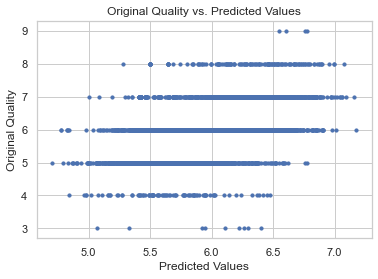

In [222]:
plt.scatter(lm.predict(X),winedf_a.quality, s=10)
plt.title('Original Quality vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Original Quality')

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [223]:
# Residual Sum of Squares (RSS)
rss = np.sum((winedf_a.quality - lm.predict(X)) ** 2)
print("Residual sum of squares: {}".format(round(rss,3)))


Residual sum of squares: 2246.779


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [224]:
# Explained Sum of Squares (ESS)
ess =  np.sum((lm.predict(X) - np.mean(winedf_a.quality)) ** 2)
print("Explained sum of squares: {}".format(round(ess,3)))

Explained sum of squares: 685.476


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

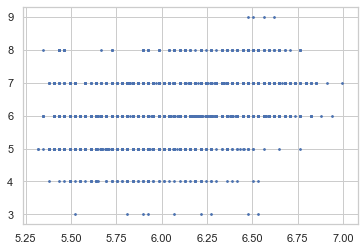

In [225]:
# your turn
m_ptratio = ols('quality ~ alcohol', winedf_a).fit()
plt.scatter(m_ptratio.fittedvalues, winedf_a.quality, s=3)

In [226]:
m_ptratio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     791.5
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          6.42e-159
Time:                        01:06:25   Log-Likelihood:                -4642.4
No. Observations:                3959   AIC:                             9289.
Df Residuals:                    3957   BIC:                             9301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8898      0.110     26.304      0.000       2.674       3.105
alcohol        0.2891      0.010     28.134      0.000       0.269       0.309
==============================================================================
Omnibus:                       70.213   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.140
Skew:                           0.116   Prob(JB):                     4.07e-28
Kurtosis:                       3.843   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ul>
    <li>Coefficient of the Intercept: 2.8898
    <li>Coefficient of alcohol: 0.2891
</ul>
On average, each increaase in one unit of alchol results in an increast of 0.2891 in the quality rating, given that all other variables are constant.

The R<sup>2</sup> value is 0.167. This is a relatively low value indicating this model does not expalin the variance of the data very well.

In [240]:
df = winedf_a
df = df.rename({'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'fixed acidity': 'fixed_acidity', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide', 'residual sugar':'residual_sugar'}, axis=1)


In [241]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine type,rating
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,1,superior
87,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.9966,3.39,0.64,9.6,5,1,fine
93,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.9966,3.39,0.64,9.6,5,1,fine
97,7.0,0.50,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5,1,fine
104,7.2,0.49,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5,1,fine


In [246]:
m_four = ols('quality ~ alcohol+chlorides+volatile_acidity+citric_acid', data=df).fit()
m_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     238.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          8.51e-184
Time:                        01:29:40   Log-Likelihood:                -4575.4
No. Observations:                3959   AIC:                             9161.
Df Residuals:                    3954   BIC:                             9192.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5983      0.172     20.902      0.000       3.261       3.936
alcohol              0.2823      0.012     23.473      0.000       0.259       0.306
chlorides           -4.5909      1.399     -3.281      0.001      -7.334      -1.848
volatile_acidity    -1.6935      0.158    -10.726      0.000      -2.003      -1.384
citric_acid          0.0299      0.154      0.194      0.846      -0.272       0.332
==============================================================================
Omnibus:                       70.799   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.976
Skew:                           0.102   Prob(JB):                     3.62e-29
Kurtosis:                       3.867   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:

m_three = ols('quality ~ alcohol+chlorides+volatile_acidity', data=df).fit()
m_three.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     318.2
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          4.48e-185
Time:                        01:41:38   Log-Likelihood:                -4575.4
No. Observations:                3959   AIC:                             9159.
Df Residuals:                    3955   BIC:                             9184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6070      0.166     21.708      0.000       3.281       3.933
alcohol              0.2825      0.012     23.532      0.000       0.259       0.306
chlorides           -4.5799      1.398     -3.276      0.001      -7.321      -1.839
volatile_acidity    -1.6976      0.156    -10.853      0.000      -2.004      -1.391
==============================================================================
Omnibus:                       70.707   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.600
Skew:                           0.103   Prob(JB):                     4.37e-29
Kurtosis:                       3.866   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
m_two = ols('quality ~ alcohol+chlorides', data=df).fit()
m_two.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     406.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):          2.95e-161
Time:                        01:30:22   Log-Likelihood:                -4633.5
No. Observations:                3959   AIC:                             9273.
Df Residuals:                    3956   BIC:                             9292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4275      0.168     20.432      0.000       3.099       3.756
alcohol        0.2625      0.012     21.808      0.000       0.239       0.286
chlorides     -5.9810      1.412     -4.235      0.000      -8.750      -3.212
==============================================================================
Omnibus:                       74.988   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.706
Skew:                           0.117   Prob(JB):                     7.59e-31
Kurtosis:                       3.887   Cond. No.                     1.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Standardize the Data

In [256]:
#Declare the dependent and independent variables
x = df[['alcohol','chlorides','volatile_acidity']]
y = df['quality']

In [259]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [260]:
#Regression
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [261]:
#Find the intercept
reg.intercept_

5.960848699166456

In [262]:
#Find the coefficients
reg.coef_

array([ 0.34153769, -0.04718775, -0.13423901])

In [263]:
#Calculate the R-squared
reg.score(x_scaled,y)

0.1944429489754088

## Predictions from our Model II

In [320]:
predictions = lm.predict(X_test)

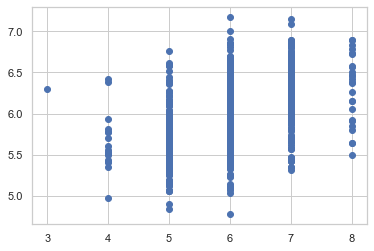

In [321]:
plt.scatter(y_test,predictions)